In [1]:
%matplotlib inline

import os
import pathlib
import numpy as np
import cv2
import pathlib
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [2]:
dataDir='./ts'
class_names='./classes.names'

In [3]:
cats = []
with open(class_names) as f:
    n_id = 1
    for line in f:
        name = line.strip()
        #ats.append({'id':n_id, 'name': name})
        cats.append({n_id: name})
        n_id+=1
cats

[{1: 'prohibitory'}, {2: 'danger'}, {3: 'mandatory'}, {4: 'other'}]

In [4]:
dataFiles = os.listdir(dataDir)
ids = [ x.split('.jpg')[0] for x in dataFiles if '.jpg' in x ]
ids

['00754',
 '00117',
 '00175',
 '00794',
 '00822',
 '00236',
 '00063',
 '00894',
 '00732',
 '00412',
 '00680',
 '00188',
 '00593',
 '00323',
 '00688',
 '00427',
 '00122',
 '00269',
 '00316',
 '00491',
 '00141',
 '00066',
 '00403',
 '00746',
 '00841',
 '00011',
 '00302',
 '00685',
 '00045',
 '00499',
 '00153',
 '00805',
 '00531',
 '00204',
 '00838',
 '00436',
 '00630',
 '00098',
 '00785',
 '00272',
 '00497',
 '00168',
 '00087',
 '00155',
 '00758',
 '00674',
 '00277',
 '00502',
 '00184',
 '00373',
 '00254',
 '00444',
 '00440',
 '00402',
 '00022',
 '00208',
 '00126',
 '00516',
 '00374',
 '00265',
 '00320',
 '00102',
 '00654',
 '00209',
 '00368',
 '00251',
 '00634',
 '00706',
 '00692',
 '00648',
 '00678',
 '00620',
 '00710',
 '00273',
 '00729',
 '00075',
 '00047',
 '00482',
 '00219',
 '00201',
 '00378',
 '00359',
 '00647',
 '00851',
 '00872',
 '00655',
 '00742',
 '00701',
 '00158',
 '00074',
 '00490',
 '00895',
 '00151',
 '00009',
 '00026',
 '00410',
 '00452',
 '00465',
 '00635',
 '00508',


./ts/00117.jpg (800, 1360, 3)


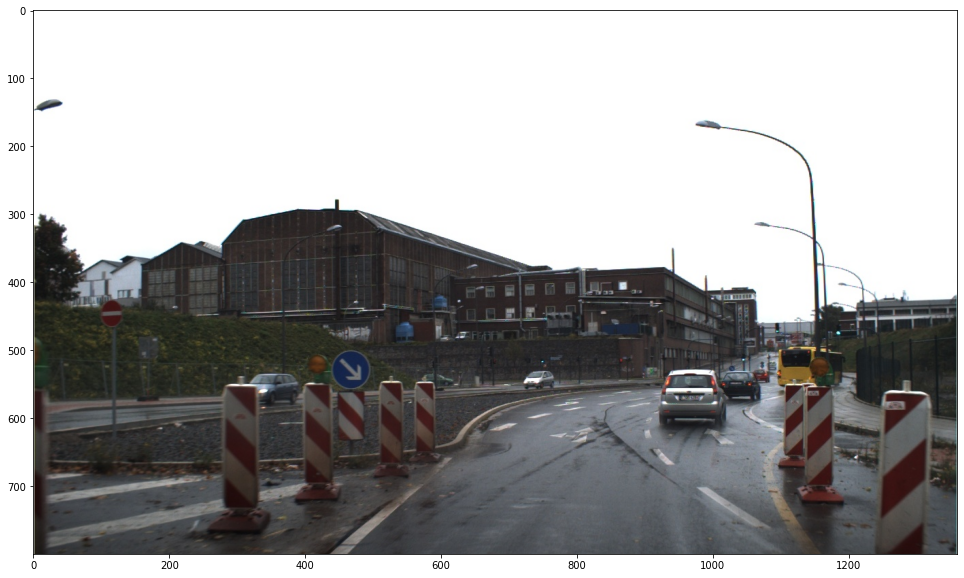

In [5]:
img_file = '{}/{}.jpg'.format(dataDir,ids[1])
img = cv2.imread(img_file)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img_file, img.shape)
#plt.rcParams['figure.figsize'] = (8.0, 10.0)
plt.rcParams['figure.figsize'] = [21,10]
plt.imshow(img_rgb)
#plt.title(img_file) 
#plt.axis("off")
plt.show()

In [6]:
ann_file = '{}/{}.txt'.format(dataDir,ids[1])
anno=[]
with open(ann_file) as f:
    def yolo2pix(bbox_list, img_shape):
        #dw, dh, _ = img_shape
        dh, dw, _ = img_shape
        bx = dw*(bbox_list[0] - bbox_list[2]/2)
        bw = dw*bbox_list[2]
        by = dh*(bbox_list[1] - bbox_list[3]/2)
        bh = dh*bbox_list[3]
        return bx, by, bw, bh
        
    for line in f:
        cat_id, centerX, centerY, w, h = list(map(float, line.strip().split(' ')))
        print("category_id: ", cat_id, ", bbox:", centerX, centerY, w, h)
        bx, by, bw, bh = yolo2pix([centerX, centerY, w, h], img.shape)
        an = {"category_id":int(cat_id),"category_name":cats[int(cat_id)], "bbox": [bx, by, bw, bh]}
        anno.append(an)
        print(an)
#print(anno)

category_id:  3.0 , bbox: 0.08455882352941177 0.556875 0.023529411764705882 0.05125
{'category_id': 3, 'category_name': {4: 'other'}, 'bbox': [99.0, 425.0, 32.0, 41.0]}
category_id:  2.0 , bbox: 0.34338235294117647 0.66125 0.04264705882352941 0.0725
{'category_id': 2, 'category_name': {3: 'mandatory'}, 'bbox': [438.00000000000006, 500.0, 58.0, 57.99999999999999]}


[[99.0, 425.0], [99.0, 466.0], [131.0, 466.0], [131.0, 425.0]]
[[438.00000000000006, 500.0], [438.00000000000006, 558.0], [496.00000000000006, 558.0], [496.00000000000006, 500.0]]


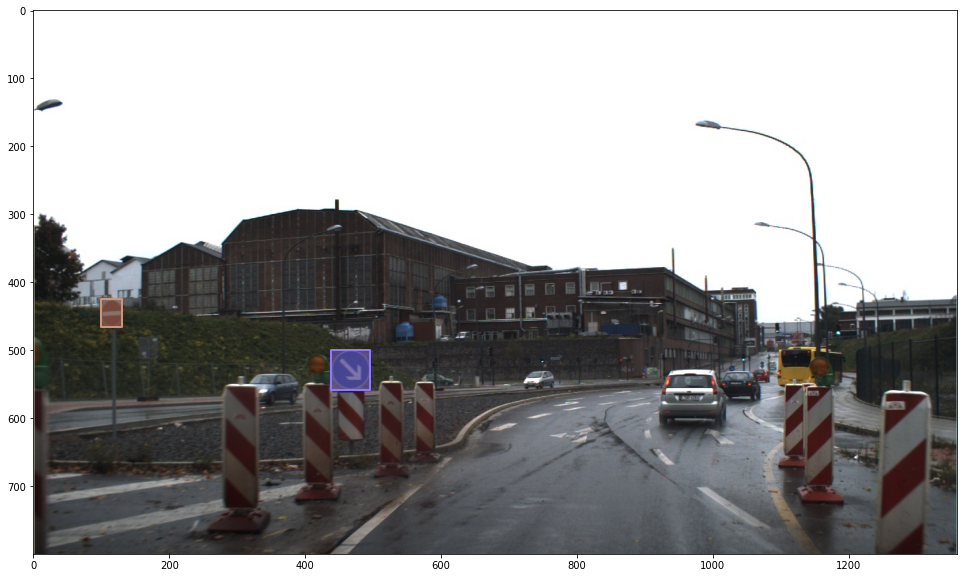

In [7]:
plt.imshow(img_rgb)
polys = []
color = []
ax = plt.gca()
ax.set_autoscale_on(False)
for an in anno:
    bx, by, bw, bh = an['bbox']
    poly = [[bx, by], [bx, by+bh], [bx+bw, by+bh], [bx+bw, by]]
    print(poly)
    np_poly = np.array(poly) #.reshape((4,2))
    polys.append(Polygon(np_poly))
    c = (np.random.random((1, 3))*0.6+0.4).tolist()[0] # random color
    color.append(c)

p = PatchCollection(polys, facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection(polys, facecolor='none', edgecolors=color, linewidths=2)
ax.add_collection(p)

plt.show()